# 基本设置

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [5]:
cor_table = pd.read_excel('datasets_fea/topic_data_fea/topic_cor_table.xlsx', header = None)
print cor_table.shape
used_data = pd.read_excel('datasets_fea/topic_data_fea/topic_data.xlsx', header = None)
print used_data.shape

(328, 328)
(328, 1)


# cluster

## DBSCAN

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(cor_table)

In [10]:
predict_label = db.labels_  # 类别标签
label_indice = db.core_sample_indices_ # 标签位置
print '---------- predict_label ' , len(predict_label)
print predict_label
print '---------- label_indice ' , len(label_indice)
print label_indice

---------- predict_label  328
[ 0 -1 -1 -1 -1 -1  0 -1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1
  1  0  0 -1  0  0 -1 -1 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1
 -1  0 -1 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0 -1  0  0
  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1  0  0
 -1 -1 -1  0  0 -1  0  0 -1  0  0 -1 -1  0 -1  0 -1  0  0 -1  0  0  0 -1
 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1  0
 -1 -1  0 -1 -1  0  0 -1 -1  0 -1  0  1 -1  0  1  0  0 -1  0 -1 -1 -1 -1
 -1  1 -1  0 -1  0  0  0  0  0  0 -1  0 -1  0 -1  0  0  0 -1  0  0  0  0
  0 -1  0 -1  0 -1  0  0 -1  0  0 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1  0
  1 -1  0  0 -1 -1 -1  0 -1 -1  0  0 -1 -1  0  0 -1  0 -1  0 -1  1  0  0
  0  0 -1  0  0  0  0  0  0  0  1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1  1  0
 -1  0 -1  0  0 -1  0 -1 -1  1  1 -1  0 -1 -1  0 -1  0 -1  0  0 -1  0  0
  0 -1 -1 -1 -1  0  0 -1  0  0 -1 -1  0 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1

### 评价

In [56]:
from sklearn import metrics
from datetime import datetime

print 'Calinski-Harabaz Index：', metrics.calinski_harabaz_score(cor_table, predict_label)  # 分数值越大则聚类效果越好
print '轮廓系数：', metrics.silhouette_score(cor_table, predict_label, metric='euclidean')  # 分数值越大则聚类效果越好 [-1， 1]

Calinski-Harabaz Index： 99.59247767409852
轮廓系数： 0.25576044660447456


In [66]:
def get_optimal_eps(dataset,eps_list, min_samples_list):
    '''get optimal eps param for DBSCAN 
       params: 
            dataset: the whole dataset.
            eps_list: must be in np.linspace() format or list format.
        return:
            three values：optimal eps value, 
                optimal model with optimal eps
                silhouette_scores of all candidate eps.
        '''
    scores=[]
    models=[]
    pram_res = []  # elapsed_time, eps, min_samples, Calinski, silhouette, label_num, label_class
    for eps in eps_list:
        for min_samples in min_samples_list:
            start_time = datetime.now()
            model=DBSCAN(eps = eps,min_samples = min_samples).fit(dataset)
            labels=model.labels_
            elapsed_time = '%0.2f'%((datetime.now() - start_time).seconds)
            label_class = np.unique(labels)
            label_num=len(label_class)
            if label_num>1: # 需要判断label种类，因为如果只有一个label，silhouette_score报错
                silhouette_score = metrics.silhouette_score(dataset, model.labels_)
                calinski_score = metrics.calinski_harabaz_score(dataset, model.labels_)
                scores.append(silhouette_score)
                models.append(model)
            else:
                silhouette_score = 0
                calinski_score = 0
                scores.append(silhouette_score)
                models.append(None)
            
            pram_res.append([elapsed_time, eps, min_samples, calinski_score, silhouette_score, label_num, label_class])
    optimal_id = scores.index(max(scores))
    optimal_eps = pram_res[optimal_id][1]
    optimal_min_samples = pram_res[optimal_id][2]
    return optimal_eps, optimal_min_samples, models[optimal_id], max(scores), pram_res

In [76]:
eps_list = np.linspace(0.3, 1.7, num=15)
min_samples_list = range(3, 15, 2)

optimal_eps, optimal_min_samples, optimal_model,scores, pram_res = get_optimal_eps(cor_table,eps_list, min_samples_list)

In [77]:
print 'eps_list: ',eps_list 
print 'min_samples_list: ',min_samples_list 
print 'scores: %s, optimal_eps: %s, optimal_min_samples: %s'%(scores, optimal_eps, optimal_min_samples)
print 'optimal_model: ',optimal_model 
# pram_res

eps_list:  [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]
min_samples_list:  [3, 5, 7, 9, 11, 13]
scores: 0.7793151005940437, optimal_eps: 0.8999999999999999, optimal_min_samples: 7
optimal_model:  DBSCAN(algorithm='auto', eps=0.8999999999999999, leaf_size=30,
    metric='euclidean', metric_params=None, min_samples=7, n_jobs=1,
    p=None)


In [84]:
optimal_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [78]:
pram_res = pd.DataFrame(pram_res, 
                        columns = 'elapsed_time, eps, min_samples, Calinski, silhouette, label_num, label_class'.split(', '))
pram_res

,elapsed_time,eps,min_samples,Calinski,silhouette,label_num,label_class
0,0.00,0.3,3,82.557977,0.143389,3,"[-1, 0, 1]"
1,0.00,0.3,5,157.133970,0.516930,2,"[-1, 0]"
2,0.00,0.3,7,104.833591,0.415367,3,"[-1, 0, 1]"
3,0.00,0.3,9,198.411102,0.494160,2,"[-1, 0]"
4,0.00,0.3,11,205.888967,0.495267,2,"[-1, 0]"
5,0.00,0.3,13,99.449889,0.239183,3,"[-1, 0, 1]"
6,0.00,0.4,3,132.257911,0.705661,2,"[-1, 0]"
7,0.00,0.4,5,133.137622,0.688025,2,"[-1, 0]"
8,0.00,0.4,7,133.137622,0.688025,2,"[-1, 0]"
9,0.00,0.4,9,127.578050,0.665798,2,"[-1, 0]"


In [79]:
pram_res.columns

Index([u'elapsed_time', u'eps', u'min_samples', u'Calinski', u'silhouette',
       u'label_num', u'label_class'],
      dtype='object')

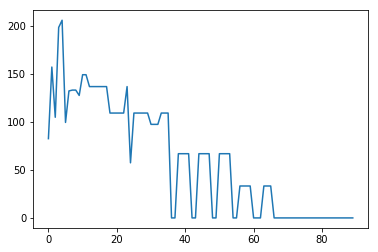

In [82]:
pram_res['Calinski'].plot()

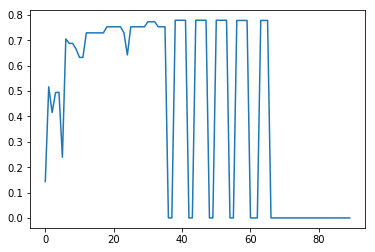

In [83]:
pram_res['silhouette'].plot()